In [1]:
from derivatives import *
import datetime as dt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%matplotlib inline

# Tests for european call

In [3]:
gbm_env = MarketEnvironment('GBE_ENV', dt.datetime(2020, 1, 1))

In [4]:
gbm_env.add_constant('initial_value', 36.)
gbm_env.add_constant('volatility', 0.2)
gbm_env.add_constant('final_date', dt.datetime(2020, 12, 31))
gbm_env.add_constant('currency', 'EUR')
gbm_env.add_constant('frequency', 'M')
gbm_env.add_constant('paths', 10000)

In [5]:
csr_model = ConstantShortRate('csr', 0.06)

In [6]:
gbm_env.add_curve('discount_curve', csr_model)

In [7]:
gbm_model = GeometricBrownianMotion('gbm', gbm_env)

In [8]:
gbm_model.generate_time_grid()

In [9]:
call_env = MarketEnvironment('call', gbm_model.pricing_date)

In [10]:
gbm_model.pricing_date

datetime.datetime(2020, 1, 1, 0, 0)

In [11]:
call_env.add_constant('strike', 40.)

In [12]:
call_env.add_constant('maturity', dt.datetime(2020, 12, 31))

In [13]:
call_env.add_constant('currency', 'EUR')

In [14]:
payoff_func = 'np.maximum(maturity_value - strike, 0)'

In [15]:
call = ValuationEuropeanMonteCarlo('call_env', underlying=gbm_model,
mar_env=call_env, payoff_func=payoff_func)

In [16]:
%time call.present_value()

CPU times: user 0 ns, sys: 7.13 ms, total: 7.13 ms
Wall time: 6.35 ms


2.203498

In [17]:
%time call.delta()

CPU times: user 9.35 ms, sys: 347 µs, total: 9.7 ms
Wall time: 9.85 ms


0.3955

In [18]:
%time call.vega()

CPU times: user 10.8 ms, sys: 4.25 ms, total: 15 ms
Wall time: 14.1 ms


14.106

In [19]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    call.update(initial_value=s)
    p_list.append(call.present_value(fixed_seed=True))
    d_list.append(call.delta())
    v_list.append(call.vega())

CPU times: user 145 ms, sys: 22.6 ms, total: 168 ms
Wall time: 168 ms


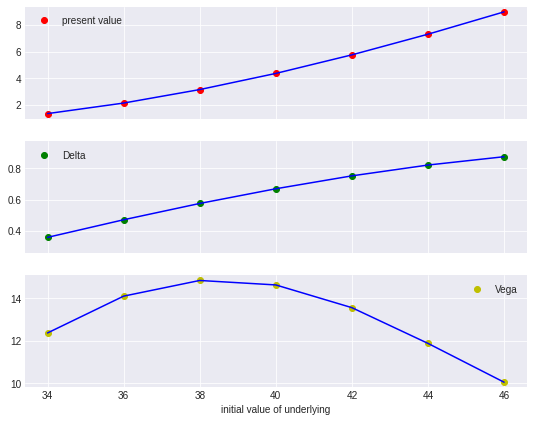

In [20]:
plot_option_stats(s_list, p_list, d_list, v_list)

CPU times: user 210 ms, sys: 19.8 ms, total: 229 ms
Wall time: 235 ms


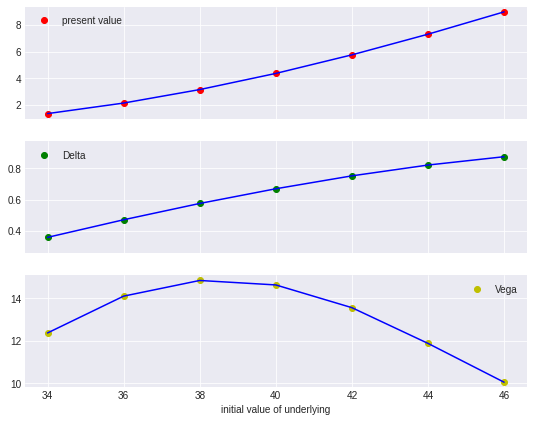

In [21]:
%time call.generate_plot(34., 46.1, 2.)

# Tests for european put

In [22]:
put_env = MarketEnvironment('put', gbm_model.pricing_date)

In [23]:
put_env.add_constant('strike', 40.)
put_env.add_constant('maturity', dt.datetime(2020, 12, 31))
put_env.add_constant('currency', 'EUR')
payoff_func_put = 'np.maximum(strike - maturity_value, 0)'

In [24]:
put = ValuationEuropeanMonteCarlo('put_env', underlying=gbm_model,
mar_env=put_env, payoff_func=payoff_func_put)

In [25]:
%time put.present_value()

CPU times: user 8.96 ms, sys: 165 µs, total: 9.13 ms
Wall time: 8 ms


0.694832

In [26]:
%time put.delta()

CPU times: user 13.9 ms, sys: 0 ns, total: 13.9 ms
Wall time: 12.2 ms


-0.1479

In [27]:
%time put.vega()

CPU times: user 12.6 ms, sys: 106 µs, total: 12.7 ms
Wall time: 11.6 ms


10.207

CPU times: user 228 ms, sys: 199 µs, total: 228 ms
Wall time: 228 ms


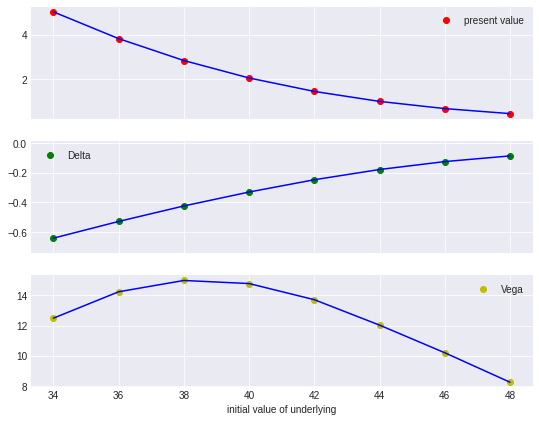

In [28]:
%time put.generate_plot(34., 50, 2.)

In [ ]:
# todo : Comparing to quantlib top options

In [ ]:
# todo : Stopping strategy

In [ ]:
# todo : Implied volatitly rate